In [109]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [134]:
Mig = pd.read_csv('../data/' + 'MissingMigrants-Global-2019-12-06T12-34-22.csv')

In [135]:
TotalDeadMissing = []
for ele in Mig['Total Dead and Missing'] :
    TotalDeadMissing.append(ele.replace(',',''))  # To replace "," in numbers like 1,234 -> 1234
    
Mig['Total Dead and Missing'] = TotalDeadMissing
Mig['Total Dead and Missing'] = pd.to_numeric(Mig['Total Dead and Missing'])

In [136]:
MigDeath = Mig.groupby(by = ["Reported Month","Reported Year"]).sum()#[["Minimum Estimated Number of Missing",'Total Dead and Missing','Number of Survivors','Number Dead']]
MigDeath.to_csv('brige.csv')  # A robust way to change inex
MigDeath = pd.read_csv('brige.csv')

In [137]:
MonList = []

for index,row in MigDeath.iterrows():
    if row['Reported Month'] == 'Jan':
        MonList.append(1)
    elif row['Reported Month'] == 'Feb':
        MonList.append(2)
    elif row['Reported Month'] == 'Mar':
        MonList.append(3)
    elif row['Reported Month'] == 'Apr':
        MonList.append(4)
    elif row['Reported Month'] == 'May':
        MonList.append(5)
    elif row['Reported Month'] == 'Jun':
        MonList.append(6)
    elif row['Reported Month'] == 'Jul':
        MonList.append(7)
    elif row['Reported Month'] == 'Aug':
        MonList.append(8)
    elif row['Reported Month'] == 'Sep':
        MonList.append(9)
    elif row['Reported Month'] == 'Oct':
        MonList.append(10)
    elif row['Reported Month'] == 'Nov':
        MonList.append(11)
    elif row['Reported Month'] == 'Dec':
        MonList.append(12)
    else:
        continue
        
MigDeath['NumMonth'] = MonList
MigDeath = MigDeath.sort_values(by = 'NumMonth')

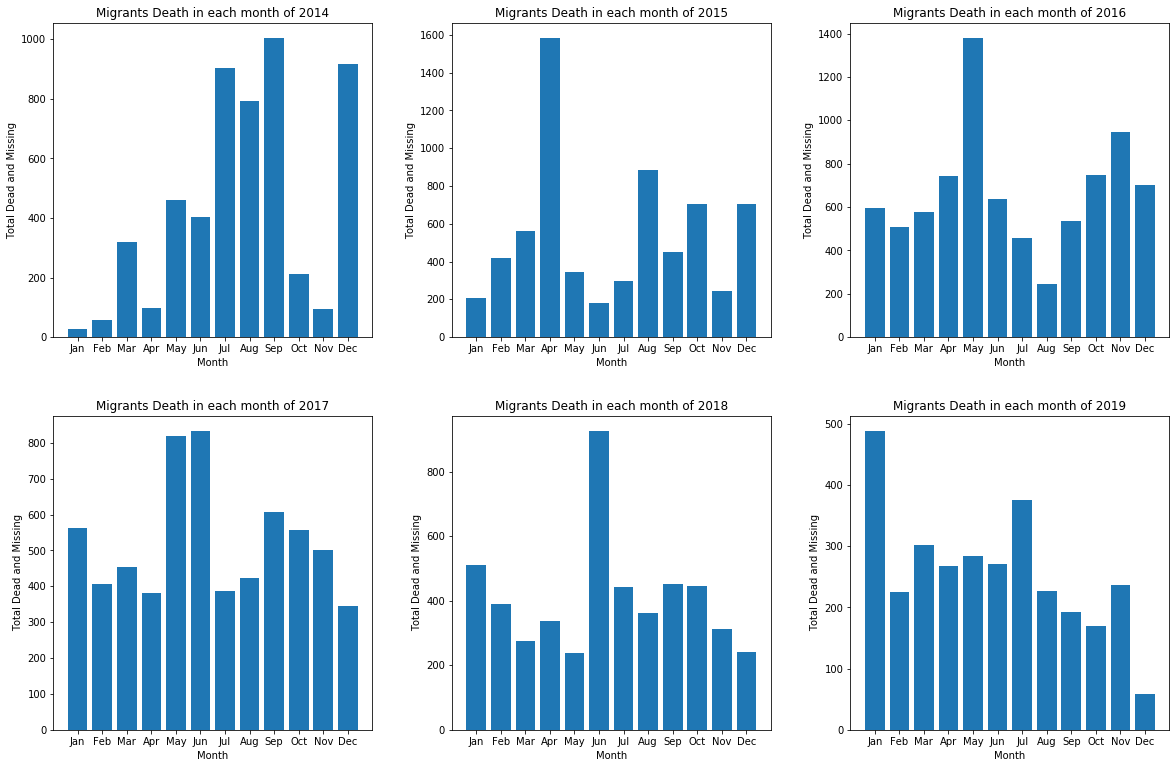

In [138]:
MigDeath_Draw = MigDeath.groupby(by = 'Reported Year').size()

fig = plt.figure(figsize=(20,13)) #create a new figure 
fig.subplots_adjust(hspace=0.25,wspace = 0.25)  # gaps between the figures 
n = 1 
for year in MigDeath_Draw.index:
    ax = fig.add_subplot(2,3,n)
    ax.set_title('Migrants Death in each month of ' + str(year))
    x = MigDeath[MigDeath['Reported Year'] == year]['Reported Month']
    y = MigDeath[MigDeath['Reported Year'] == year]['Total Dead and Missing']
    ax.bar(x,y)
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Dead and Missing')
    #plt.xticks(rotation = 90) 
    n += 1

plt.show();